Aquí lo que hicimos fue generar un nuevo Dataset a partir de nuevas coordenadas cambiando Latitud Longitud y Altura por X Y y Z
Es decir por coordenadas Cartesianas.
En el segundo intento lo que se trata de hacer es generar ese dataset nuevo, agregando el R0= 6.371E6 [m]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Utils import geo_conversions as gc

In [3]:
df = pd.read_excel("NuevoExcelCompleto_para_ver.xlsx")

In [5]:
# vamos a observar que tan balanceado tenemos el dataset.
cantidad = (df['elev_100'] != 0).sum()
print(f'Tenemos {cantidad} de 5130 filas que tienen como altura final distinta de cero.')
print(f'Esto equivale a {round((cantidad/5130)*100,3)}% del total del dataset.')
#ahora vamos a observar a mayor detalle considerando aquellas ultimas alturas que sean menores a 1000 metros
cantidad2 = ((df['elev_100'] != 0) & (df['elev_100'] < 1000)).sum()
print(f'Ahora la cantidad de filas que tienen una altura final distinta de cero pero menor a 1000 metros son {cantidad2} filas de las 5130 de mi dataset. ')
print(f'Sin considerar estas ultimas tenemos {round(((cantidad-cantidad2)/5130)*100,3)}% de mi dataset donde el trazo del rayo se pierde en Ionosfera.')
#Identifiquemos las filas ? 
condicion = (df['elev_100'] != 0) & (df['elev_100'] < 1000)
indices = df[condicion].index
print(f'Indices de las filas que cumplen con la condición, {(indices+2).tolist()}')


Tenemos 1456 de 5130 filas que tienen como altura final distinta de cero.
Esto equivale a 28.382% del total del dataset.
Ahora la cantidad de filas que tienen una altura final distinta de cero pero menor a 1000 metros son 0 filas de las 5130 de mi dataset. 
Sin considerar estas ultimas tenemos 28.382% de mi dataset donde el trazo del rayo se pierde en Ionosfera.
Indices de las filas que cumplen con la condición, []


In [6]:
# Armamos arrays con los nombres de las columnas -.- 
lat_columns = [f'lat_{i}' for i in range(1,101)]
lon_columns = [f'long_{i}' for i in range(1,101)]
height_columns = [f'elev_{i}' for i in range(1,101)]

In [7]:
df_lat = df[lat_columns]
df_lon = df[lon_columns]
df_heights = df[height_columns]

lat = df_lat.to_numpy()
lon = df_lon.to_numpy()
heights = df_heights.to_numpy()


In [8]:
df_heights.max().max() # Con esto observo si mi height se encuentra en km o m. sabiendo que los limites de mi F2 son aprox 300km entonces la altura esta en METROS

np.float64(304611.8164061997)

In [9]:
#Este bloque de codigos es solo de prueba no afecta a ninguna parte final
X1_lat = lat[1]
Y1_lon = lon[1]
Z1_h = heights[1] # [m] 
print(len(X1_lat))
print(f'Ingresa => Latitud :{X1_lat[1]}, Longitud:{Y1_lon[1]}, Altura:{Z1_h[1]}')
x1,y1,z1 = gc.transform_coords_cartesian(X1_lat,Y1_lon,Z1_h) # Aquí se pasa a coordenadas cartesianas con un R0= 1 km pasó a 6.371E6 [m]
print(f'Transf coord Cartesiana x1:{x1[1]}, y1:{y1[1]}, z:{z1[1]}')
phi_n, theta_n, rho_n = gc.transform_cartesian_to_spherical(x1,y1,z1)
print(f'phi_1: {phi_n[1]},  theta_1: {theta_n[1]}, rho_1: {rho_n[1]}[m] ')
print(f'lat_1: {np.degrees(phi_n[1])},  long_1: {np.degrees(theta_n[1])}, en radianes rho_1: {rho_n[1]} [m]')

100
Ingresa => Latitud :-42.28498620793985, Longitud:-63.35204664268765, Altura:348.6821338393999
Transf coord Cartesiana x1:-4212891.657621308, y1:3831418.9531518705, z:2857596.3178696223
phi_1: -0.738012233488942,  theta_1: -1.1057018017919191, rho_1: 6371348.6821338395[m] 
lat_1: -42.28498620793985,  long_1: -63.352046642687654, en radianes rho_1: 6371348.6821338395 [m]


Primeras 5 Alturas: [   0.          348.68213384  365.25903572  833.45170455 3113.32563925] - Ultimas 5 Alturas: [470.01755844 162.89358424  44.67033622  20.91224748   0.        ]


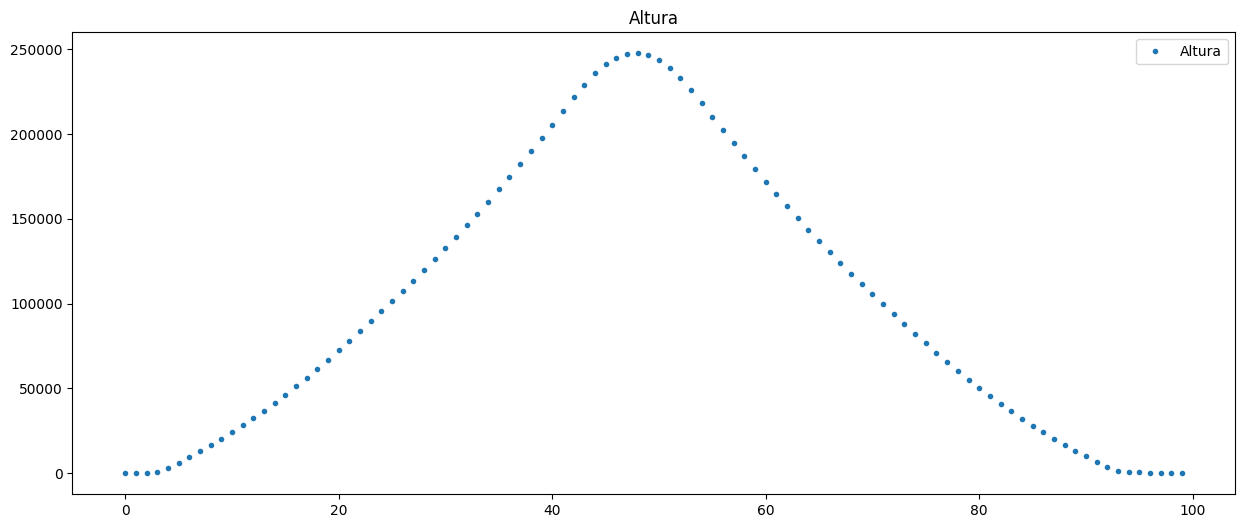

In [10]:
Alturas  = rho_n - 6.371E6
print(f'Primeras 5 Alturas: {Alturas[:5]} - Ultimas 5 Alturas: {Alturas[95:]}')
# Aca gráficas latitude Longitudes y Elevaciones
plt.figure(figsize=(15,6))
plt.plot(Alturas, label = "Altura",linestyle= 'None', marker = '.')
plt.title("Altura")
plt.legend()
# plt.ylim(-50,-38)
plt.show()

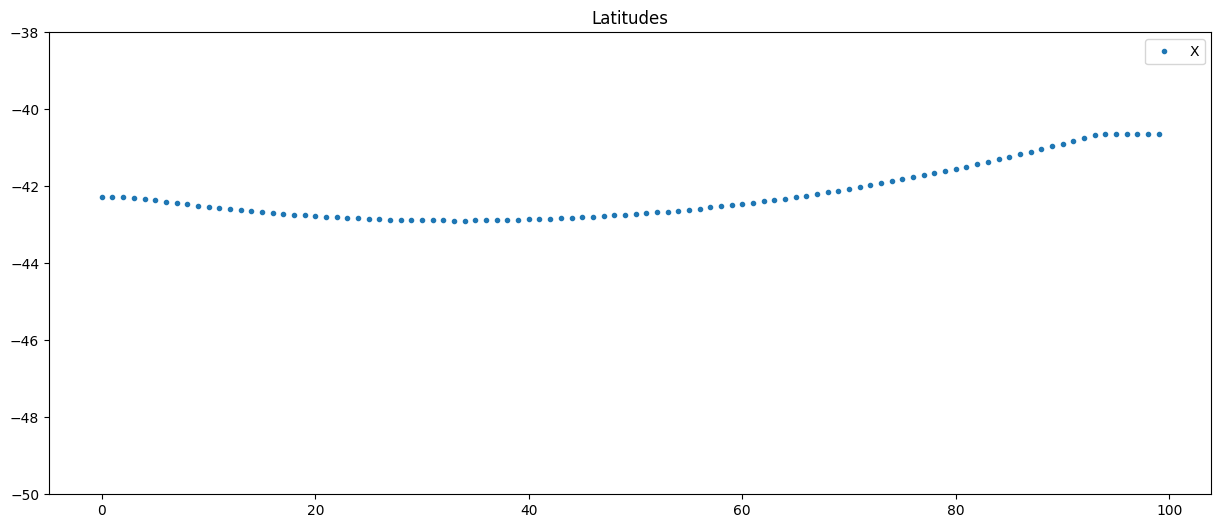

In [11]:
# Aca gráficas latitude Longitudes y Elevaciones
plt.figure(figsize=(15,6))
plt.plot(X1_lat, label = "X",linestyle= 'None', marker = '.')
plt.title("Latitudes")
plt.legend()
plt.ylim(-50,-38)
plt.show()

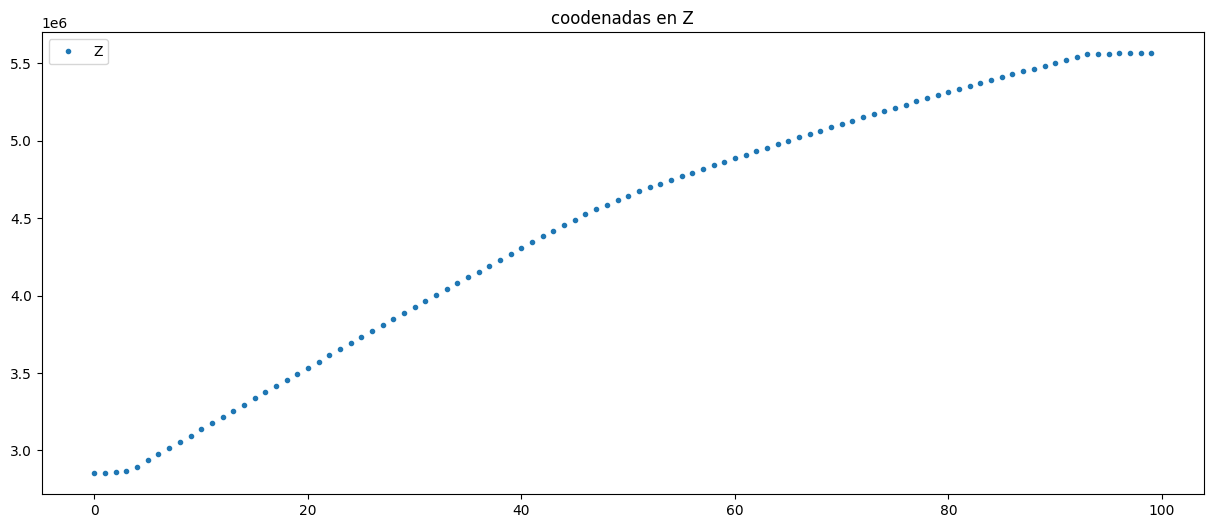

In [12]:
# Graficamos X Y Z considerando la curvatura real de la tierra.
# Graf. Alturas
plt.figure(figsize=(15,6))
plt.plot(z1, label = "Z",linestyle= 'None', marker = '.')
plt.title("coodenadas en Z")
plt.legend()
plt.show()

In [13]:
df['fc'] = df['fc']/1E6
df = df.rename(columns = {'fc': 'fc [Mhz]'})
X_columns = [
    'latitude_pos_tx', 'longitude_pos_tx', 'elevation_pos_tx', 'fc [Mhz]', 'elevation', 
    'azimuth', 'year', 'mmdd', 'UTI', 'hour', 'delay', 'terrestrial_range', 'slant_range'
]
df_x = df[X_columns]
# Heights ingresa en metros
x,y,z = zip(*(map(lambda args: np.array(gc.transform_coords_cartesian(*args)), zip(lat, lon, heights))))
# divido la altura en 1000 para que esten en km ya que estan en m

# genero el dataset para agregar 
x_columns = [f'x_{i}' for i in range(1,101)]
y_columns = [f'y_{i}' for i in range(1,101)]
z_columns = [f'z_{i}' for i in range(1,101)]
x_df = pd.DataFrame(x,columns = x_columns)
y_df = pd.DataFrame(y,columns = y_columns)
z_df = pd.DataFrame(z,columns = z_columns)
coord_df = pd.concat([df_x,x_df,y_df,z_df], axis = 1)

coord_df.head()

,latitude_pos_tx,longitude_pos_tx,elevation_pos_tx,fc [Mhz],elevation,azimuth,year,mmdd,UTI,hour,...,z_91,z_92,z_93,z_94,z_95,z_96,z_97,z_98,z_99,z_100
0,-42.28,-63.4,0,10.0,5,98,2010,101,0,0,...,5.347149e+06,5.364321e+06,5.381376e+06,5.395852e+06,5.402989e+06,5.403534e+06,5.405281e+06,5.405514e+06,5.405522e+06,5.405530e+06
1,-42.28,-63.4,0,10.0,5,98,2010,101,0,4,...,5.504143e+06,5.522380e+06,5.540480e+06,5.558443e+06,5.562530e+06,5.562752e+06,5.564807e+06,5.565603e+06,5.565765e+06,5.565904e+06
2,-42.28,-63.4,0,10.0,5,98,2010,101,0,8,...,4.391655e+06,4.401295e+06,4.404997e+06,4.404998e+06,4.406369e+06,4.408294e+06,4.410779e+06,4.413395e+06,4.413649e+06,4.413652e+06
3,-42.28,-63.4,0,10.0,5,98,2010,101,0,12,...,4.389582e+06,4.389583e+06,4.389561e+06,4.389513e+06,4.389494e+06,4.389494e+06,4.389622e+06,4.389797e+06,4.389971e+06,4.390145e+06
4,-42.28,-63.4,0,10.0,5,98,2010,101,0,16,...,4.404927e+06,4.404928e+06,4.405595e+06,4.407596e+06,4.409352e+06,4.410866e+06,4.411374e+06,4.411380e+06,4.411385e+06,4.411391e+06


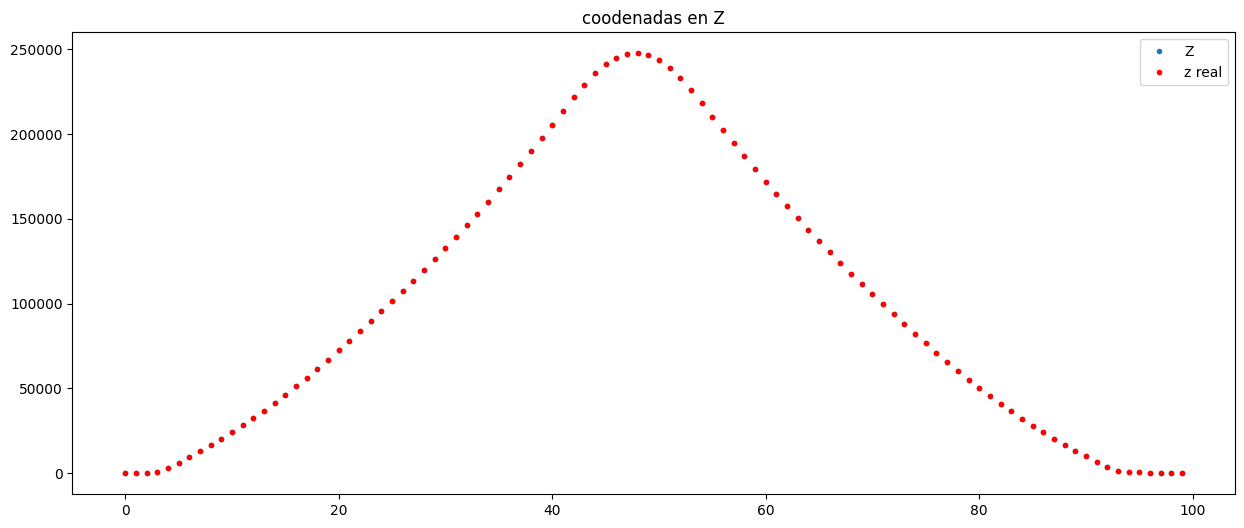

C:\Users\Alexis\AppData\Local\Temp\ipykernel_14052\218852889.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


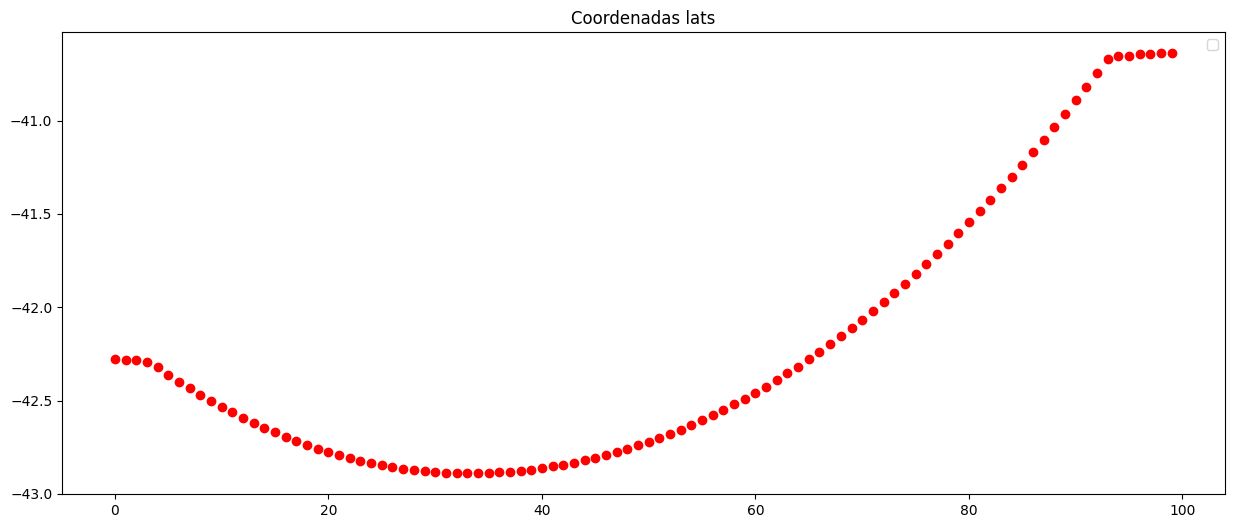

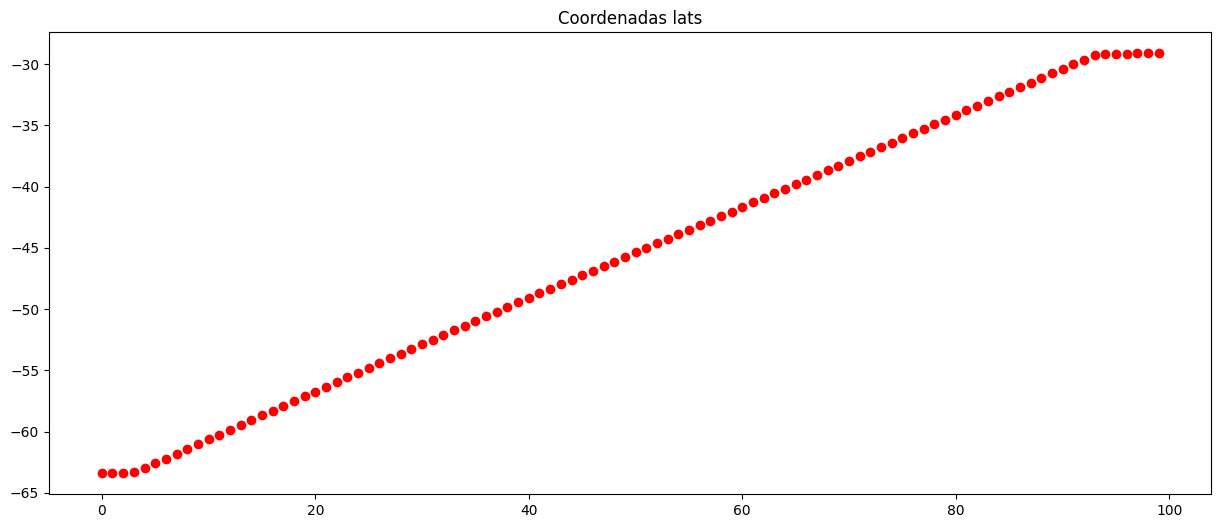

In [14]:
#TOMO UN VALOR DE TODOS LOS CONVERTIDOS Y OBSERVO SI COINCIDE CON LA ORIGINAL ANTES DE CONVERTIR EN SU CONJUNTO TOTAL.
phi1,theta1,rho1= gc.transform_cartesian_to_spherical(x_df.iloc[1].to_numpy(),y_df.iloc[1].to_numpy(),z_df.iloc[1].to_numpy())
lat1,lon1, Altura1 = gc.transform_spherical_to_geographic(phi1,theta1,rho1)
Altura1=Altura1-6.371E6
plt.figure(figsize = (15,6))
plt.plot(Altura1, label = "Z",linestyle= 'None', marker = '.')
plt.plot(Z1_h,label= "z real",linestyle = 'None', marker= '.', color = 'red')
plt.title("coodenadas en Z")
plt.legend()
plt.show()
## CONFIRMAMOS QUE SE REALIZA BIEN LA TRANSFORMACIÓN EN 'Z' / ALTURA 

plt.figure(figsize=(15,6))
plt.plot(lat1,linestyle = 'None', marker= '.',color = 'blue')
plt.plot(X1_lat, linestyle = 'None', marker = 'o', color = 'red')
plt.title('Coordenadas lats')
plt.legend()
plt.show()
## TAMBIEN SE CONFIRMA LA BUENA CONVERSION PARA LATITUDES.
plt.figure(figsize = (15,6))
plt.plot(lon1,linestyle = 'None', marker= '.',color = 'blue')
plt.plot(Y1_lon, linestyle = 'None', marker = 'o', color = 'red')
plt.title('Coordenadas lats')
plt.show()

## se confirma que para las 3 coordenadas se realizaron las conversiones correctamente por lo que se puede guardar con 
# normalidad un nuevo dataset.


In [16]:
z_columns = [f'z_{i}' for i in range(1,101)]
type(z_columns)
print(x_columns)

['x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78', 'x_79', 'x_80', 'x_81', 'x_82', 'x_83', 'x_84', 'x_85', 'x_86', 'x_87', 'x_88', 'x_89', 'x_90', 'x_91', 'x_92', 'x_93', 'x_94', 'x_95', 'x_96', 'x_97', 'x_98', 'x_99', 'x_100']


In [17]:
# Aquí la se realiza el guardado del nuevo dataset R0 = 6.371E6
coord_df.to_excel('dataset/dataset-with-coord-cartesians-radio-original.xlsx', index = False)